# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 2.  線性迴歸訓練資料、測試資料

80%  training data, 20%  testing data ==> 先利用此來驗證各種模型(演算法)的好壞及調好到最佳參數
之後可以利用由這個80%的訓練資料所得的模型後,拿100%資料re-train模型以得到最佳模型 (此model會更佳fit data)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
#生成數據集

#0-5切50份
x = np.linspace(0, 5, 50)
#y斜率1.2，節距0.8，然後隨機加一些random noise
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)
#分割數據集。random_state是資料集隨機排序順序。
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

print(x_train)

[4.08163265 1.73469388 1.83673469 0.         2.75510204 3.36734694
 3.67346939 4.28571429 1.02040816 0.30612245 4.18367347 1.32653061
 4.69387755 0.20408163 3.87755102 3.97959184 0.51020408 4.3877551
 3.7755102  3.06122449 0.6122449  2.95918367 1.63265306 1.93877551
 5.         4.48979592 2.14285714 3.26530612 3.46938776 0.71428571
 2.24489796 1.12244898 2.04081633 0.91836735 4.89795918 2.85714286
 3.16326531 1.53061224 2.65306122 3.57142857]


In [4]:
y

array([0.61786197, 0.25997772, 1.89073364, 1.02401558, 0.62806076,
       1.02108439, 2.25791222, 2.6726447 , 1.10824707, 0.93548954,
       0.87378351, 2.08210621, 2.14513901, 4.09688176, 1.84751831,
       2.64667127, 2.98712757, 3.47872291, 2.22253677, 3.8587329 ,
       2.89593406, 3.46291891, 2.91146885, 3.40626316, 5.40087473,
       2.52929677, 2.65306054, 4.71656662, 4.46953692, 4.68322462,
       4.02295297, 5.04883591, 4.42079761, 5.97233602, 4.54573612,
       4.96139643, 4.95548707, 5.06487375, 5.3128887 , 5.51854791,
       6.00612701, 4.68321149, 6.55671505, 6.26821478, 6.09811555,
       5.42766006, 6.36539952, 6.92239012, 7.26040198, 7.99159368])

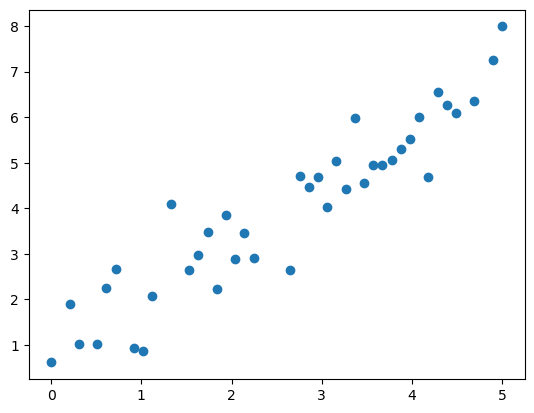

In [5]:
plt.scatter(x_train, y_train)

#### 用訓練資料來 fit 函數

記得現在我們只用 80% 的資料去訓練。

In [6]:
regr = LinearRegression()
#把資料及變成二維，因為scikit-learn中的回歸模型期望輸入是一個2D陣列
X_train = x_train.reshape(-1,1)
regr.fit(X_train,y_train)
print('Coefficients: ', regr.coef_)
print('interception: ', regr.intercept_)

#查看訓練完的模型斜率和節距各為多少。原本是1.2&0.8，模型結果是1.05&1.28，可見不太準確。

Coefficients:  [1.2103984]
interception:  0.8321346423651255


In [7]:
#儲存模型預測資料
Y_train = regr.predict(X_train)

In [8]:
#用MSE來評估模型成效
mse = np.sum((Y_train-y_train)**2) / len(y_train)
print(mse)

0.43846605211543543


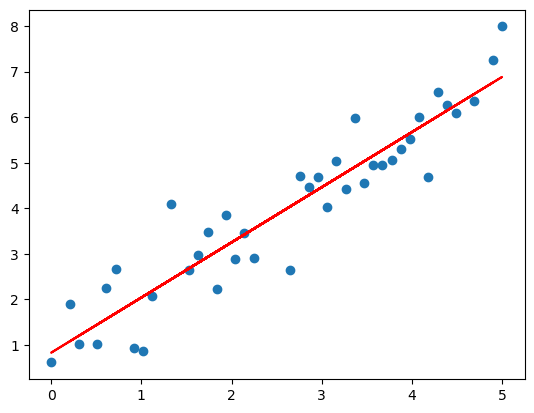

In [9]:
#查看原始和預測的圖
plt.scatter(x_train, y_train)
plt.plot(x_train, Y_train, 'r')

#### test with test data

In [11]:
#儲存測試集預測結果(用套件)
X_test = x_test.reshape(-1,1)
Y_test = regr.predict(X_test)

print(Y_test)

[2.31425513 2.56127521 1.3261748  1.82021497 6.39008646 0.95564468
 3.91988565 3.79637561 6.63710654 3.67286557]


$$\widehat{y}=xw+b=w_{1}x_{1}+b$$

In [12]:
#Y=WX+b，用numpy計算預設結果
W=regr.coef_
b=regr.intercept_
W*X_test+b


array([[2.31425513],
       [2.56127521],
       [1.3261748 ],
       [1.82021497],
       [6.39008646],
       [0.95564468],
       [3.91988565],
       [3.79637561],
       [6.63710654],
       [3.67286557]])

In [13]:
mse = np.sum((Y_test-y_test)**2) / len(y_test)
print(mse)

#測試集MSE比訓練集MSE大是正確的

0.7603146162790322


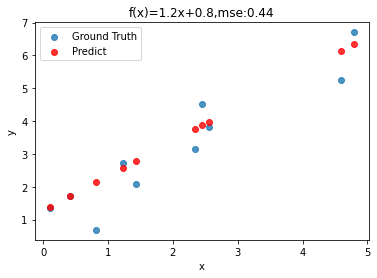

In [25]:
title='f(x)=1.2x+0.8'+',mse:'+str(round(mse,2))
plt.title(title)
plt.xlabel('x')
plt.ylabel('y')
#plt.grid(True)
plt.scatter(x_test, y_test,alpha=0.8,label='Ground Truth')
plt.scatter(x_test, Y_test, c='r', alpha=0.8,label='Predict')
plt.legend()